In [14]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import cv2
from google.colab.patches import cv2_imshow

In [9]:
url = 'https://i.pinimg.com/736x/bd/3e/4e/bd3e4ec18f3ea1cf63fa46976d492f38.jpg'

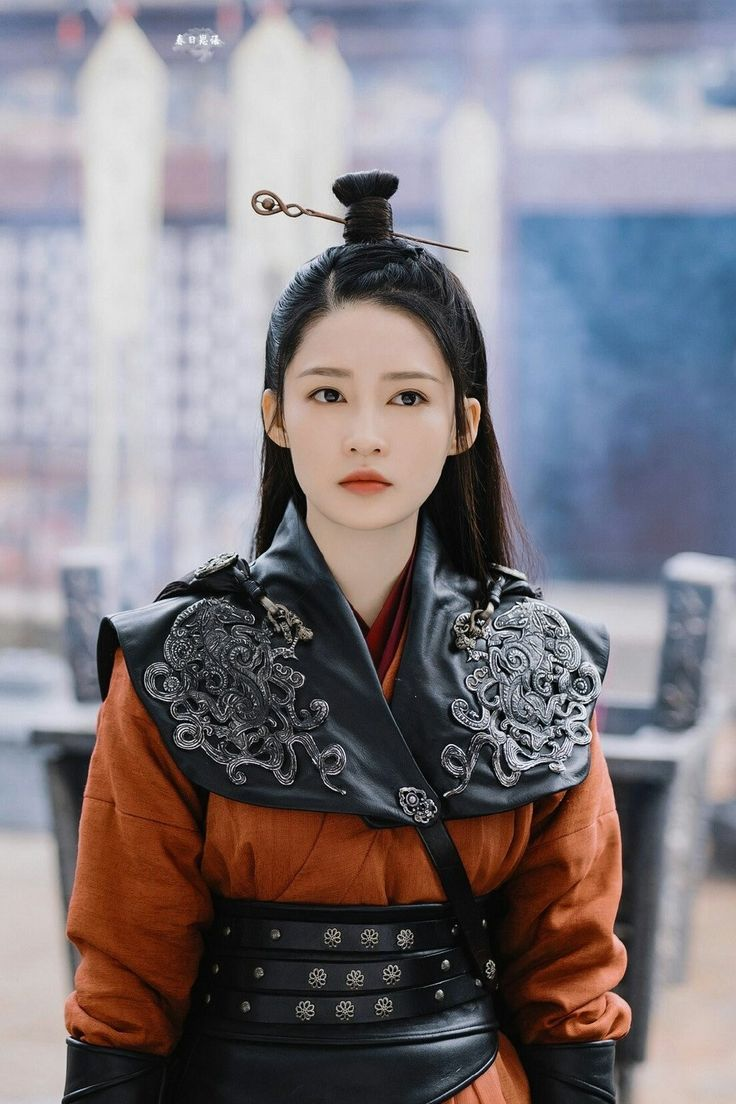

In [22]:
response = urlopen(url)
image = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

cv2_imshow(img)

Face detection model

In [16]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2023-05-10 20:39:39--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2023-05-10 20:39:40 (15.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



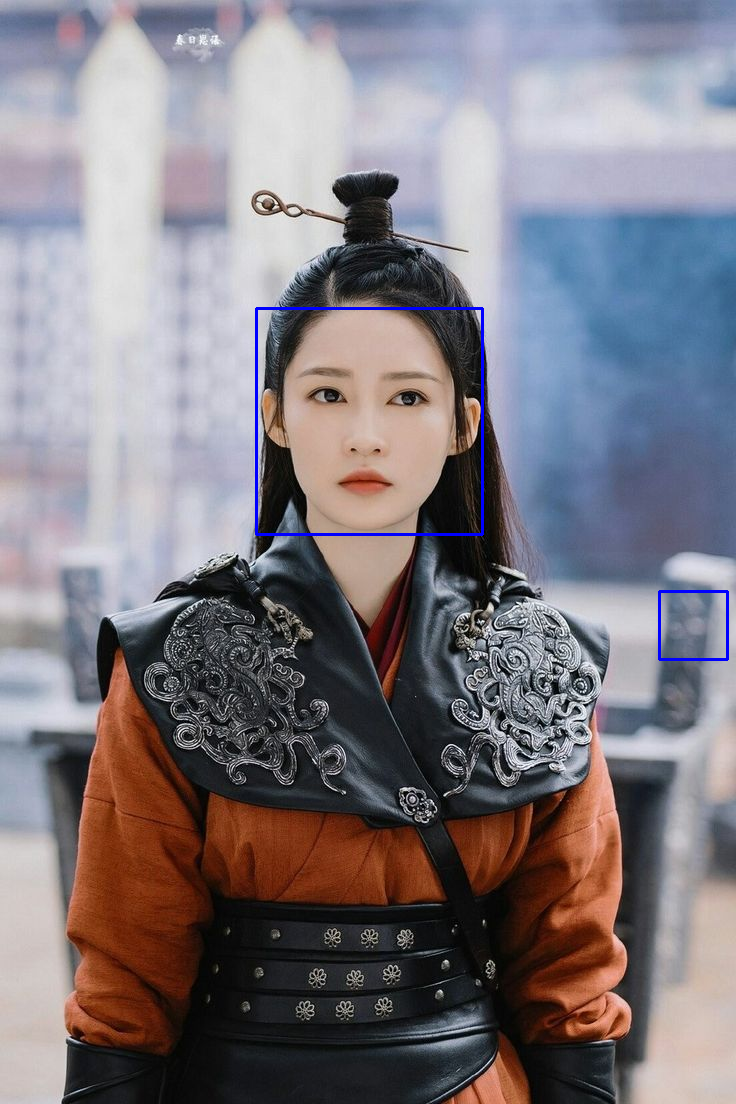

In [24]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw blue rectangle around the faces
for (x, y, w, h) in faces:
    # use rectangle method, set the color to blue (B=max, G=0, R=0) and thickness to 2
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 ,0), 2)
# Display the output
cv2_imshow(img)

In [25]:
#coordinates of the face
(x, y, w, h) = faces[0]
print((x,y), (x+w, y+h))

(256, 308) (482, 534)


In [27]:
faces[0]

array([256, 308, 226, 226], dtype=int32)

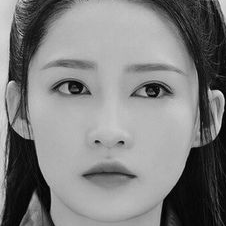

In [28]:
# extract face from image using gray scale
face = gray[ y:y+h, x:x+w]
cv2_imshow(face)

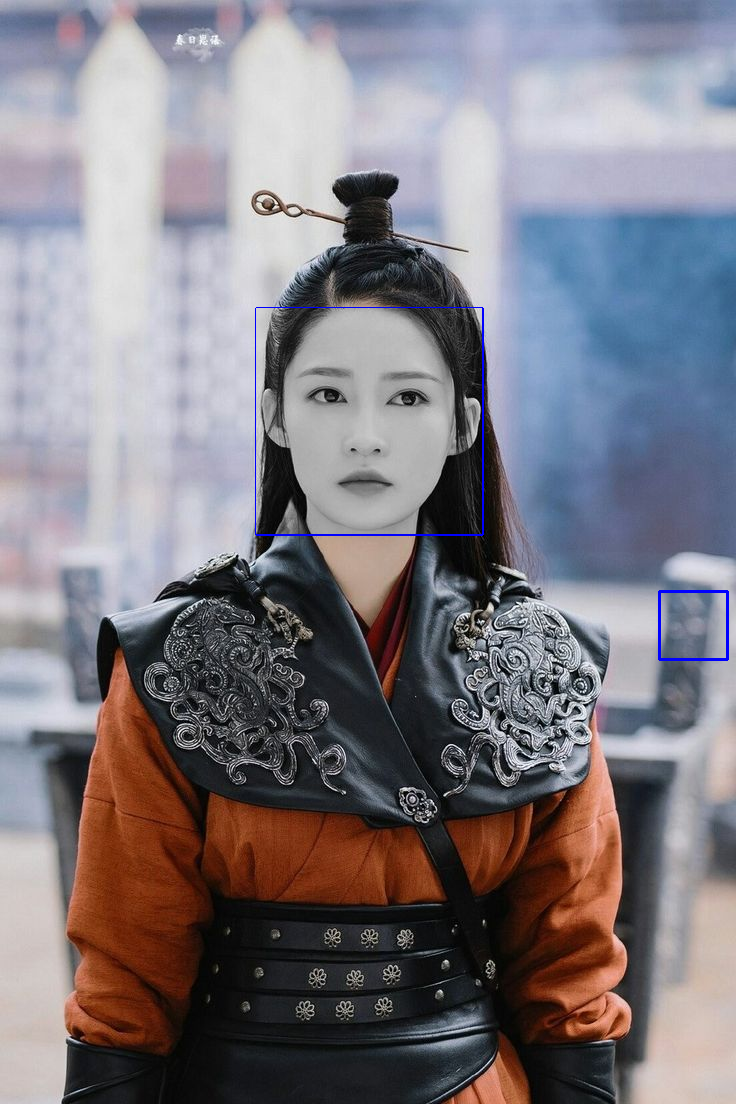

In [29]:
# Put the grayscale image on the colored image 
grayscale_three_channels = cv2.merge([face, face, face])
img[y:y+h, x:x+w] = grayscale_three_channels
cv2_imshow(img)

(256, 308) (256, 534) (482, 308) (482, 534)


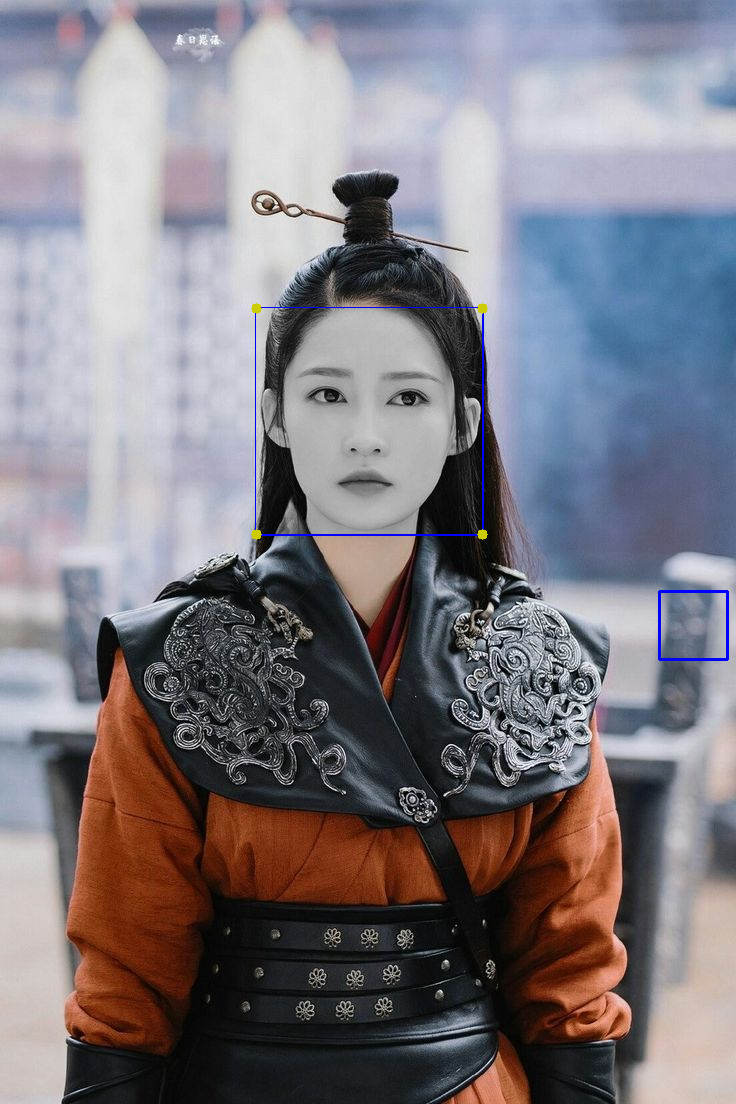

In [31]:
x, y = faces[0][:2]
w, h =  faces[0][2:]
left_upper = (x,y)
left_lower = (x,y+h)
right_upper = (x+w, y)
right_lower = (x+w, y+h)
print(left_upper, left_lower, right_upper, right_lower)
circle_coordinates = [left_upper, left_lower, right_upper, right_lower]

for circle_center in circle_coordinates:
    cv2.circle(img, circle_center, 5, (0, 204, 204), -1)
cv2_imshow(img)